### Praca domowa 6

***Martyna Sadowska***

Poniżej znajduje się kod oraz wygenerowany przez niego graf pokazuący liczbę interakcji między bohaterami filmu 'Kraina Lodu'.
Dane dostępne [tutaj](https://petterhol.me/2019/07/19/frozen-weighted-network/).

In [97]:
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

In [98]:
frozenGraph = nx.read_edgelist("Frozen.txt", nodetype=str, data=(("interactions", int),))

In [99]:
weights = np.array([e[2]["interactions"] for e in frozenGraph.edges(data=True)])
max_weight = np.max(weights)

In [100]:
node_degree = dict(frozenGraph.degree(weight = "Weight"))
node_size = np.array([10*node_degree[n] for n in frozenGraph.nodes()])

In [101]:
pos = nx.kamada_kawai_layout(frozenGraph)

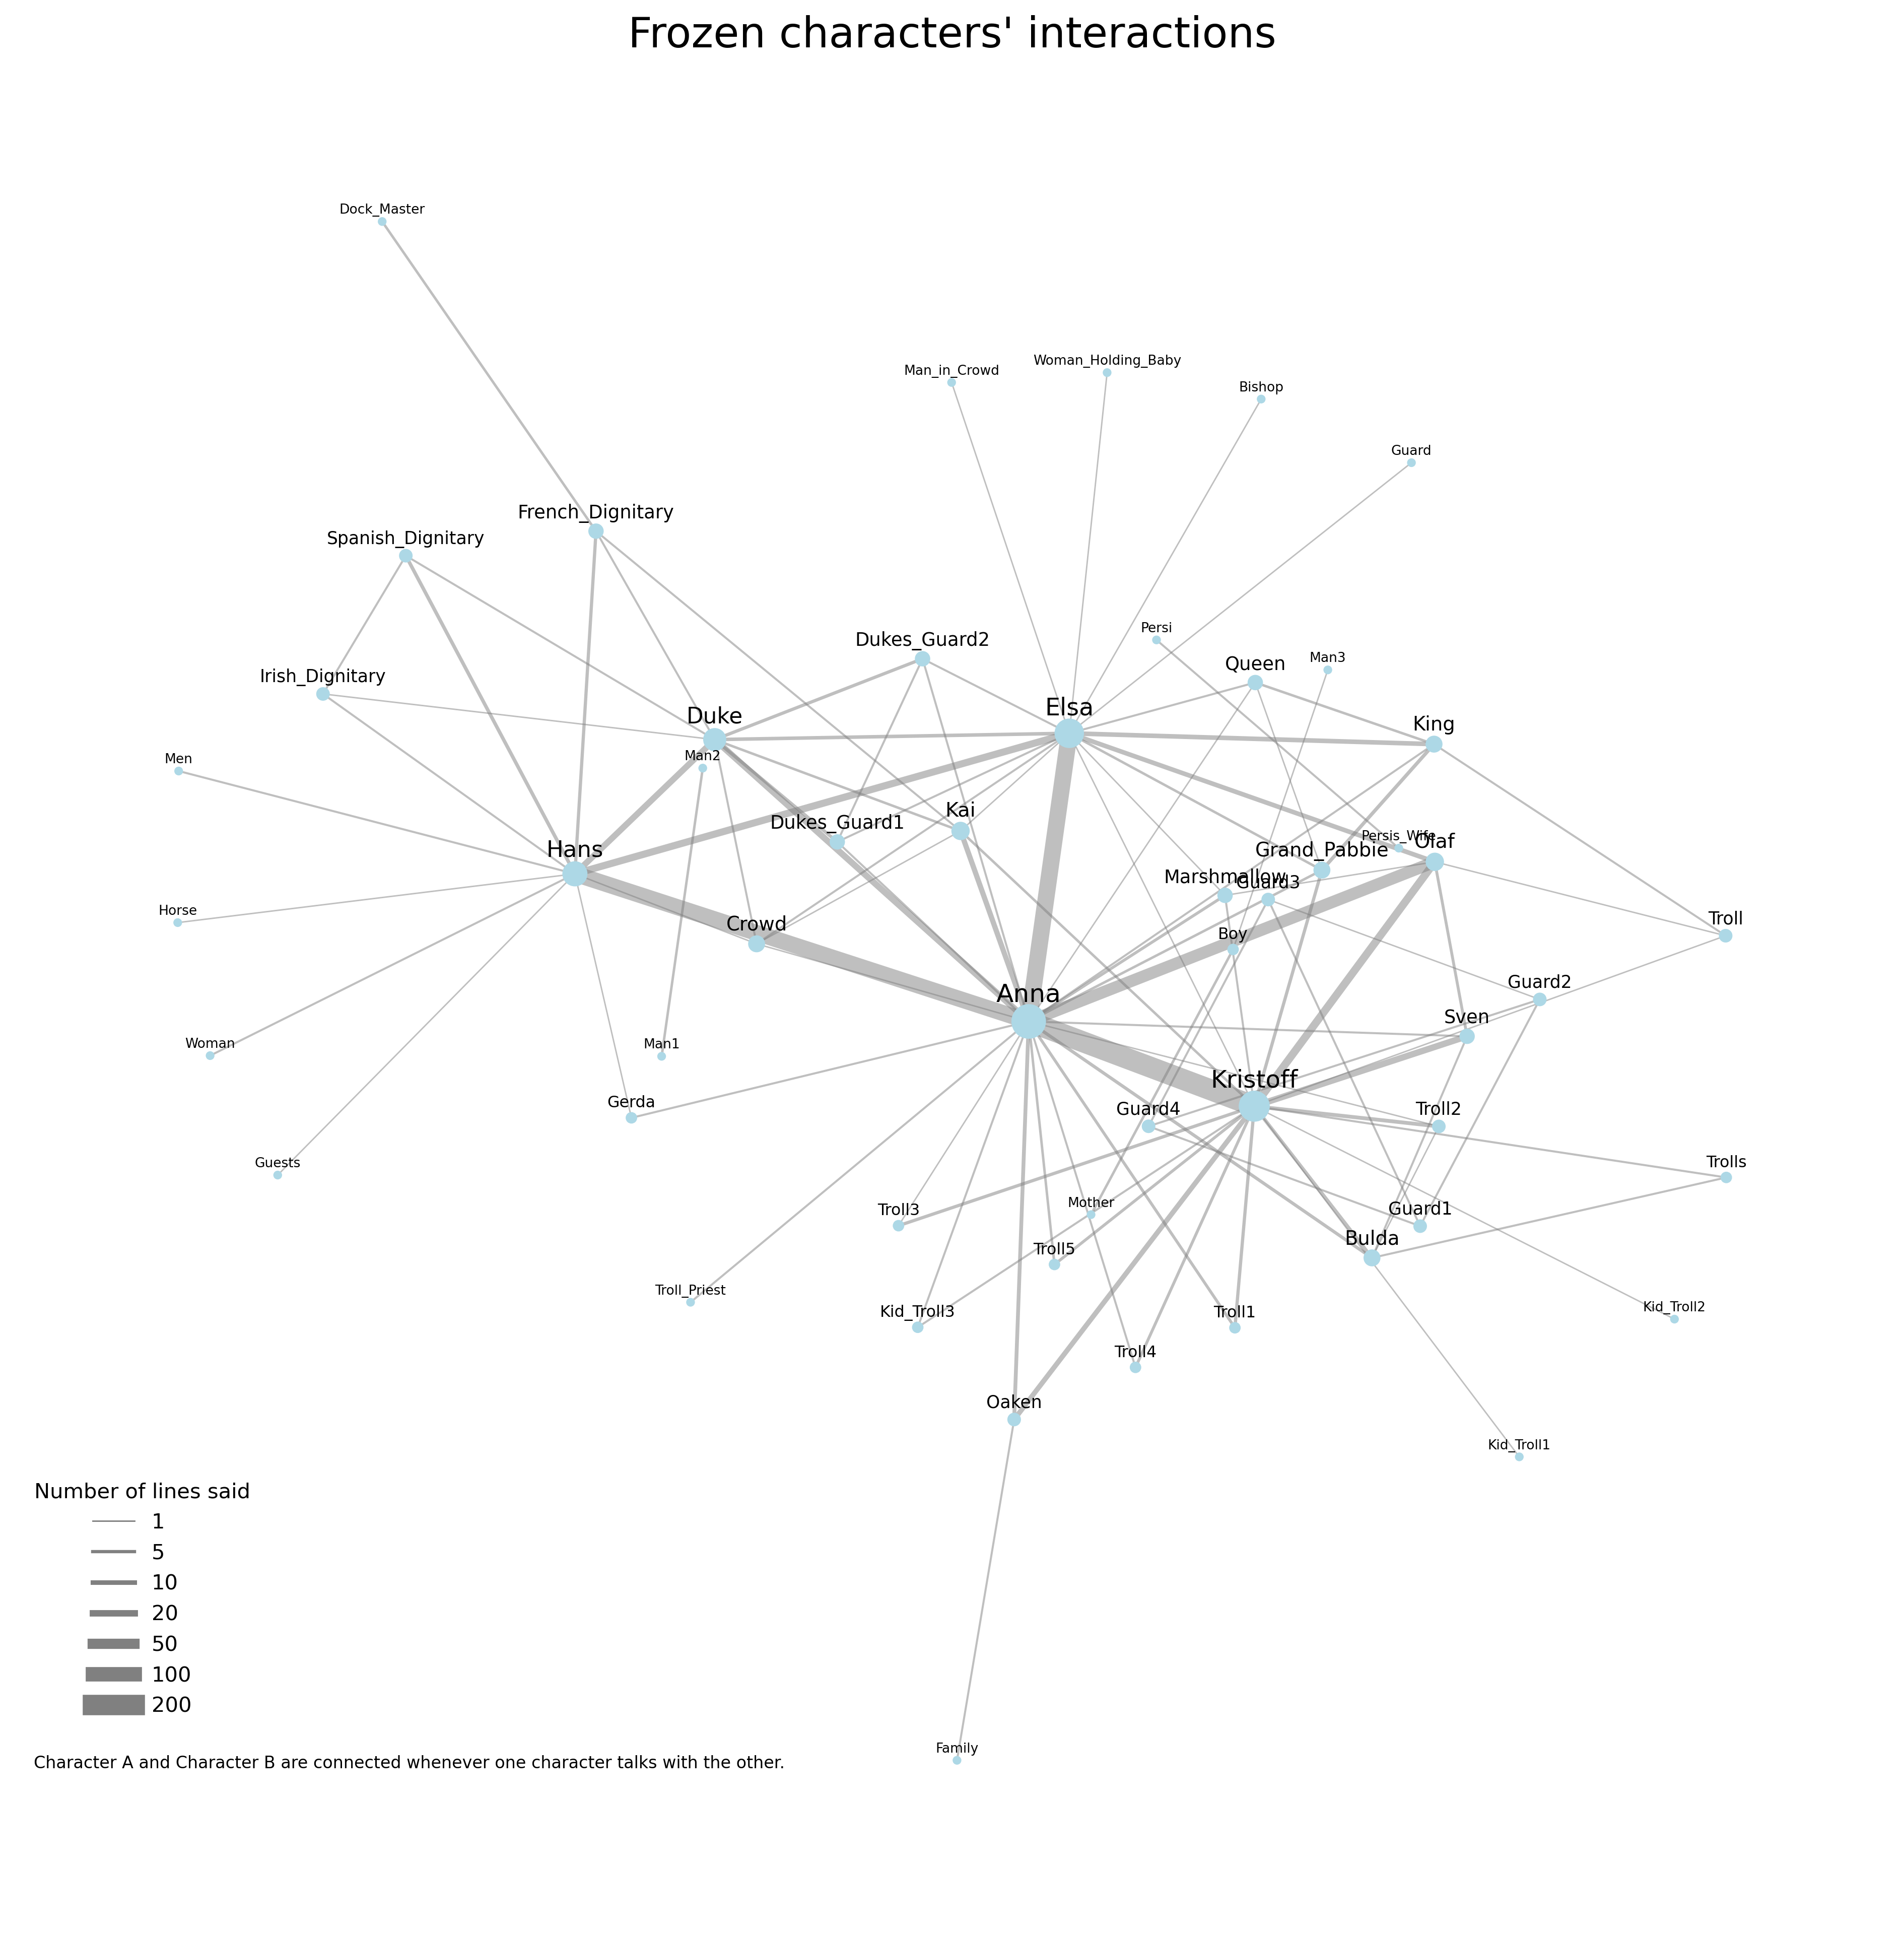

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16), dpi = 300)

ax.set_title("Frozen characters' interactions", fontsize=20)

nx.draw_networkx_nodes(frozenGraph, 
    pos=pos, 
    node_color="lightblue", 
    node_size=node_size, 
    ax=ax
)

nx.draw_networkx_edges(
    frozenGraph,
    pos=pos,
    width=np.sqrt(weights / max_weight) * 10,
    edge_color="gray",
    alpha=0.5,
    ax=ax,
)

for i, (node, (x, y)) in enumerate(pos.items()):
    ax.text(x, y + 0.006*np.log(node_size[i]), node, fontsize=2.2 + 1.8*np.log(node_size[i]), ha="center", va="center")

for w in [1, 5, 10, 20, 50, 100, 200]:
    ax.plot([], [], "gray", linewidth=np.sqrt(w) / np.sqrt(max_weight) * 10, label=w)
ax.legend(title="Number of lines said", frameon=False, bbox_to_anchor=(0, 0.1), loc = "lower left")
ax.text(0.01, 0.1, 
"""
Character A and Character B are connected whenever one character talks with the other.
""", 
    fontsize=8, 
    transform=ax.transAxes,
    verticalalignment="top" )
plt.axis("off")
plt.show()

In [109]:
fig.savefig("FrozenGraph.png") 